## Laboratorio N° 01: Crear un reporte asociado a los datos de negocio

Basado en el conjunto de datos "credit data.csv"

Crear un reporte con la siguiente descripción:

- Periodo de analisis: de 2014 a 2015
- Unidad de Tiempo: Trimestral (y total anual)
- Grupos de analisis: Por ingreso mensual con grupos. 
    * menos de 2.500
    * 2.500 a 5.000
    * 5.000 a 10.000
    * mas de 10.000
- KPIs:
    - Número de Créditos
    - delincuencia promedio (porcentaje de clientes en morosidad de 90dpd)
    - ingreso mensual promedio
- Estructura de tabla:
    * cuartos en columnas
    * Grupos y KPIs en filas.
- Dibuja una gráfica con:
    - Barras apiladas para el número de créditos
    - Líneas para la morosidad media

Adicional, Analisis de Data Exploratorio:

- Crear un par gráfico de parejas para todas las variables
- Crear un gráfico con Ingresos VS Edad en el medio, más distribuciones marginales    

### 1. Import the data

While importing, be sure to take care of:  
    - variable format
    - missing values:
        * missing in MonthlyIncome must be filled with the median
        * missing in NumberOfDependents must be filled with 0
    - dates
    

In [0]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
# import the data
df = pd.read_csv('credit data.csv', sep=';')
df

,Id,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,cohort_date
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0,17/09/2015
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0,02/07/2016
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0,13/04/2016
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0,26/08/2016
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0,18/11/2015
5,6,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0,15/06/2016
6,7,0,0.305682,57,0,5710.000000,NaN,8,0,3,0,0.0,12/12/2015
7,8,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0,01/04/2016
8,9,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN,22/06/2014
9,10,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0,03/07/2014


In [0]:
# check types
df.dtypes

Id                                        int64
SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
cohort_date                              object
dtype: object

In [0]:
# check the dates are well loaded
df.count()

Id                                      150000
SeriousDlqin2yrs                        150000
RevolvingUtilizationOfUnsecuredLines    150000
age                                     150000
NumberOfTime30-59DaysPastDueNotWorse    150000
DebtRatio                               150000
MonthlyIncome                           120269
NumberOfOpenCreditLinesAndLoans         150000
NumberOfTimes90DaysLate                 150000
NumberRealEstateLoansOrLines            150000
NumberOfTime60-89DaysPastDueNotWorse    150000
NumberOfDependents                      146076
cohort_date                             150000
dtype: int64

### 2. Missing values inputation

In [0]:
# check missings

df.isnull().sum().sum()

33655

In [0]:
# missing imputation
df['MonthlyIncome'].isnull()

0         False
1         False
2         False
3         False
4         False
5         False
6          True
7         False
8          True
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16         True
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
149970    False
149971    False
149972    False
149973    False
149974    False
149975     True
149976     True
149977     True
149978    False
149979    False
149980    False
149981    False
149982    False
149983    False
149984     True
149985    False
149986    False
149987    False
149988    False
149989    False
149990    False
149991    False
149992     True
149993    False
149994    False
149995    False
149996    False
149997     True
149998    False
149999    False
Name: MonthlyIncome, Len

In [0]:
# check missings
df['MonthlyIncome'].isnull().sum()

29731

### 3. Select the data sample for the report

In [0]:
# filter by date

df['cohort_date'] = pd.to_datetime(df['cohort_date'])
filtro_date = '17-09-2016'
mask = (df['cohort_date'] > filtro_date)
df = df.loc[mask]
df

,Id,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,cohort_date
17,18,0,0.166284,53,0,0.188274,8800.0,7,0,0,0,0.0,2016-12-06
38,39,0,0.363636,26,0,0.009990,1000.0,1,0,0,0,0.0,2016-10-06
41,42,0,0.072898,81,0,75.000000,NaN,7,0,0,0,0.0,2016-10-01
78,79,0,0.335559,69,0,0.270449,15000.0,14,0,2,0,1.0,2016-11-01
97,98,0,0.010531,57,0,0.280665,5714.0,6,0,1,0,0.0,2016-11-04
224,225,0,0.455951,63,1,0.701766,6001.0,19,0,2,0,0.0,2016-12-05
241,242,0,0.002857,73,0,0.000286,10500.0,10,0,0,0,0.0,2016-10-01
248,249,0,0.012151,78,0,0.008887,4500.0,12,0,0,0,0.0,2016-12-01
285,286,0,0.048244,62,0,0.262879,16615.0,11,0,1,0,1.0,2016-12-02
361,362,0,0.186683,30,0,0.698121,2500.0,7,0,2,0,2.0,2016-11-05


In [0]:
# checking
df['cohort_date'].count()

3612

### 4. Create intermediate variables

Hints: 
- use *.dt.year and *.dt.quarter for date columns and astype() to convert columns
- use pd.cut() method for binning a variable

In [0]:
# create quarter variable
df['year'] = pd.DatetimeIndex(df['cohort_date']).year
df.head()

,Id,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,cohort_date,year
17,18,0,0.166284,53,0,0.188274,8800.0,7,0,0,0,0.0,2016-12-06,2016
38,39,0,0.363636,26,0,0.009990,1000.0,1,0,0,0,0.0,2016-10-06,2016
41,42,0,0.072898,81,0,75.000000,NaN,7,0,0,0,0.0,2016-10-01,2016
78,79,0,0.335559,69,0,0.270449,15000.0,14,0,2,0,1.0,2016-11-01,2016
97,98,0,0.010531,57,0,0.280665,5714.0,6,0,1,0,0.0,2016-11-04,2016


In [0]:
# create income_groups variable


In [0]:
# check




,Id,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,cohort_date,Quarter,Income Group
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0,2015-09-17,2015-3,Group 3
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0,2015-11-18,2015-4,Group 4
6,7,0,0.305682,57,0,5710.000000,5400.0,8,0,3,0,0.0,2015-12-12,2015-4,Group 3
8,9,0,0.116951,27,0,46.000000,5400.0,2,0,0,0,0.0,2014-06-22,2014-2,Group 3
9,10,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0,2014-03-07,2014-1,Group 4


### 5. Create report

In [0]:
# make dataframe groupby object





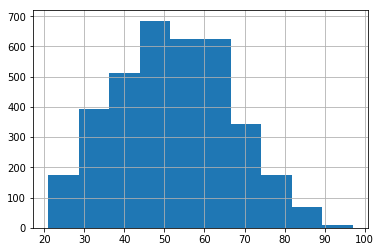

In [0]:
# report for age

df['age'].hist()

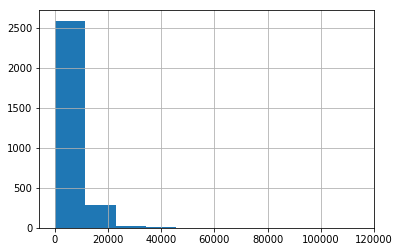

In [0]:
# report for MonthlyIncome

df['MonthlyIncome'].hist()

In [0]:
# merge both reports





,Income Group,Quarter,Num loans,Delinquency,Income
0,Group 1,2014-1,1560,0.082692,1683.596795
1,Group 1,2014-2,1545,0.104207,1709.381877
2,Group 1,2014-3,1486,0.094886,1678.436743
3,Group 1,2014-4,1569,0.101976,1666.393244
4,Group 1,2015-1,1524,0.087270,1675.868110


In [0]:
# pivot table



# arrange for final report



# export to csv




Quarter                         2014-1        2014-2        2014-3  \
Income Group                                                         
Group 1      Delinquency      0.082692      0.104207      0.094886   
             Income        1683.596795   1709.381877   1678.436743   
             Num loans     1560.000000   1545.000000   1486.000000   
Group 2      Delinquency      0.088301      0.084932      0.088118   
             Income        3838.567492   3832.727945   3832.210631   
             Num loans     3556.000000   3650.000000   3518.000000   
Group 3      Delinquency      0.054484      0.056326      0.058782   
             Income        6470.650570   6499.673648   6450.835689   
             Num loans     7103.000000   7066.000000   7145.000000   
Group 4      Delinquency      0.041543      0.046110      0.040517   
             Income       18130.696142  16482.202305  15837.686436   
             Num loans     1685.000000   1735.000000   1703.000000   

Quarter                         2014-4        2015-1        2015-2  \
Income Group                                                         
Group 1      Delinquency      0.101976      0.087270      0.102923   
             Income        1666.393244   1675.868110   1655.060292   
             Num loans     1569.000000   1524.000000   1642.000000   
Group 2      Delinquency      0.079920      0.085162      0.093519   
             Income        3845.432254   3834.719977   3830.233655   
             Num loans     3491.000000   3464.000000   3518.000000   
Group 3      Delinquency      0.056920      0.057347      0.059867   
             Income        6464.588867   6494.781455   6480.926798   
             Num loans     7168.000000   7010.000000   7049.000000   
Group 4      Delinquency      0.041593      0.042388      0.039414   
             Income       16990.752197  16240.778507  15663.829955   
             Num loans     1707.000000   1675.000000   1776.000000   

Quarter                         2015-3        2015-4  
Income Group                                          
Group 1      Delinquency      0.083499      0.096178  
             Income        1686.732273   1680.112824  
             Num loans     1509.000000   1622.000000  
Group 2      Delinquency      0.084371      0.090403  
             Income        3803.901521   3844.262031  
             Num loans     3615.000000   3595.000000  
Group 3      Delinquency      0.060669      0.062171  
             Income        6454.233236   6485.409859  
             Num loans     7203.000000   7222.000000  
Group 4      Delinquency      0.055911      0.039071  
             Income       15568.647641  16868.279728  
             Num loans     1717.000000   1766.000000

### 6. Graph

In [0]:
# bar plot



# line plot




### 7. Exploratory Data Analysis

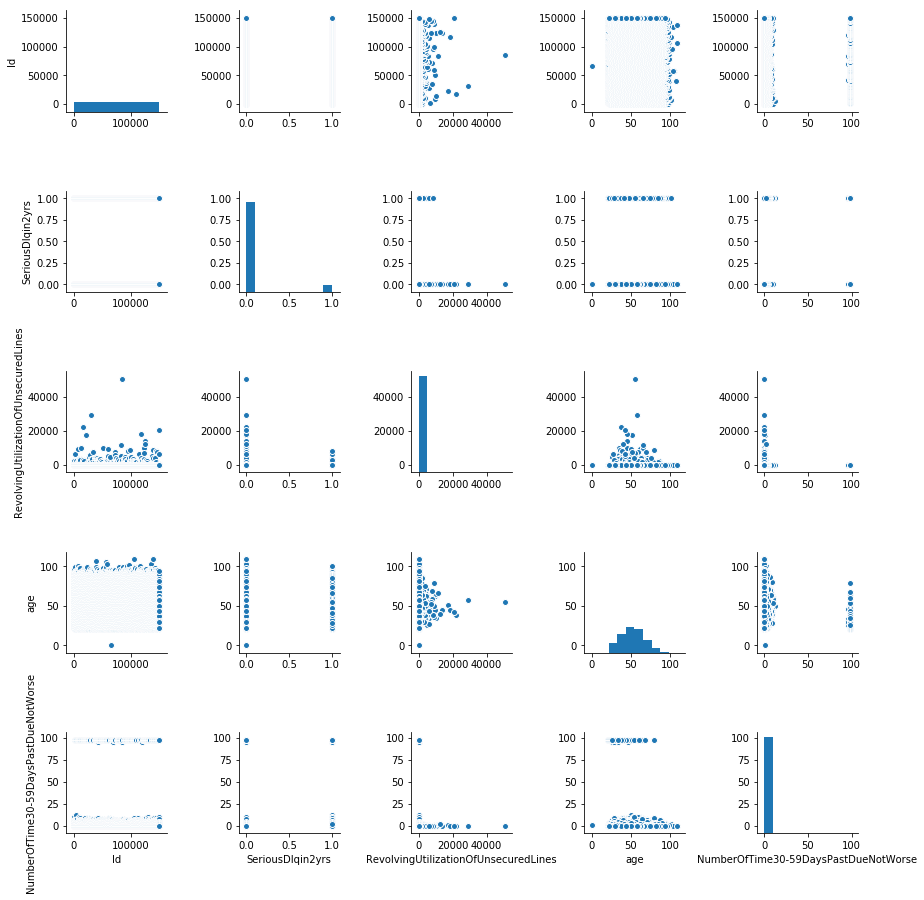

In [0]:
# Correlation plot




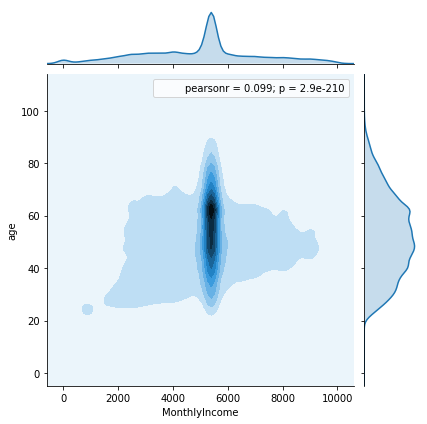

In [0]:
# Scatter plot with margins


